In [1]:
from quantum_electron import FullModel, PotentialVisualization
from quantum_electron.utils import xy2r, make_potential
from quantum_electron.initial_condition import InitialCondition
import numpy as np
from matplotlib import pyplot as plt

# Construct a potential

In [2]:
# Note that the units of x and y are implicitly assumed as microns
x = np.linspace(-2.5, 2.5, 401)
y = np.linspace(-2.5, 2.5, 401)

micron = 1e-6

X, Y = np.meshgrid(x, y)
X *= micron
Y *= micron

# parabolic_confinement = 0.01*(- X ** 2 - 8 * Y ** 2) / micron ** 2 - 2 * 0.01* (X ** 4) / micron ** 4
parabolic_confinement = 0.01*(- X ** 2 - Y ** 2) / micron ** 2 

R = 1.5e-6

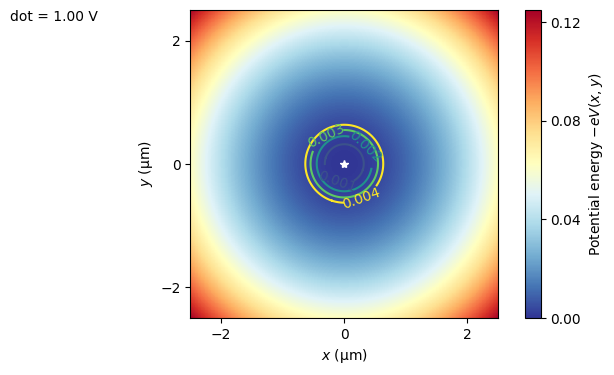

In [3]:
potential_dict = {"dot" : parabolic_confinement, 
                  "xlist" : x, 
                  "ylist" : y}

# Let's apply these voltages to the corresponding electrodes in potential_dict
voltages = {"dot" : 1.0}

p = PotentialVisualization(potential_dict, voltages)
p.plot_potential_energy(dxdy=(5, 5))

In [37]:
options = {"f0" : 4e9, # Resonance frequency for the resonator (only used for solving motional frequencies)
           "Z0" : 50.0, # Resonator impedance (only used for solving motional frequencies)
           "include_screening" : False, # Include screening of electron-electron interactions due to thin film.
           "screening_length" : 2e-6, # Typically helium thickness.
           "potential_smoothing" : 1e-4, # Numerical smoothing of the splines (gets rid of some noise, can introduce artifacts)
           "remove_unbound_electrons" : False, # Removes electrons if they shot outside the solution box.
           "remove_bounds" : None, # Sets which electrons should be removed if above is True.
           "trap_annealing_steps" : [0.1] * 4, # List of annealing temperatures, length determines the number of steps
           "max_x_displacement" : 0.1e-6, # Maximum x-displacement of solved electron positions during annealing.
           "max_y_displacement" : 0.1e-6} # Maximum y-displacement of solved electron positions during annealing.

# The circular initial condition

In [38]:
ic = InitialCondition(potential_dict, voltages)
init_cond = ic.make_circular(n_electrons=25, min_spacing=0.2)

Final L-inf norm of gradient = 14313.88 eV/m
Please check your initial condition, are all electrons confined in the simulation area?
SUCCESS: Initial minimization for Trap converged!
Perturbing solution 4 times at 0.10 K. (dx,dy) ~ (0.029, 0.029) µm...
0	Uopt: 0.74992713 eV	Norm of gradient: 7.80e+04 eV/m
1	Uopt: 0.72228744 eV	Norm of gradient: 2.83e+04 eV/m
2	Uopt: 0.68344785 eV	Norm of gradient: 2.60e+04 eV/m
3	Uopt: 0.66316258 eV	Norm of gradient: 1.58e+04 eV/m
4	Uopt: 0.65753231 eV	Norm of gradient: 1.43e+04 eV/m
5	Uopt: 0.65343141 eV	Norm of gradient: 3.11e+03 eV/m
6	Uopt: 0.65281450 eV	Norm of gradient: 2.53e+03 eV/m
7	Uopt: 0.65215842 eV	Norm of gradient: 2.78e+03 eV/m
8	Uopt: 0.65184659 eV	Norm of gradient: 1.27e+03 eV/m
9	Uopt: 0.65164599 eV	Norm of gradient: 1.07e+03 eV/m
10	Uopt: 0.65154523 eV	Norm of gradient: 9.00e+02 eV/m
11	Uopt: 0.65149114 eV	Norm of gradient: 5.06e+02 eV/m
12	Uopt: 0.65145124 eV	Norm of gradient: 4.38e+02 eV/m
13	Uopt: 0.65140758 eV	Norm of gradient: 5

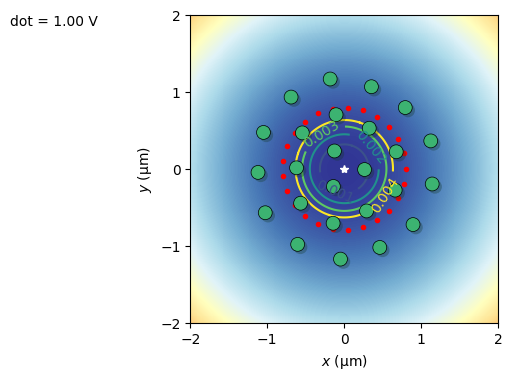

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
f = FullModel(potential_dict, voltages, **options)

res = f.get_electron_positions(n_electrons=len(init_cond) // 2, electron_initial_positions=init_cond, verbose=True)
print(f.count_electrons_in_dot(res['x'], trap_bounds_x=(-2e-6, 2e-6), trap_bounds_y=(-2e-6, 2e-6)))
f.plot_potential_energy(dxdy=(4, 4), ax=ax, plot_contours=True)
ax.plot(init_cond[::2]*1e6, init_cond[1::2]*1e6, '.r')
f.plot_electron_positions(res, ax=ax)

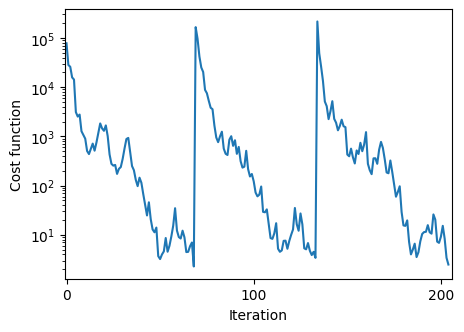

In [40]:
f.plot_convergence()

# Initial condition by chemical potential

In [41]:
ic = InitialCondition(potential_dict, voltages)
init_cond = ic.make_by_chemical_potential(max_electrons=25, chemical_potential=0.01, min_spacing=0.1)

0	Uopt: 0.70777178 eV	Norm of gradient: 1.39e+05 eV/m
1	Uopt: 0.69487829 eV	Norm of gradient: 1.31e+05 eV/m
2	Uopt: 0.68062775 eV	Norm of gradient: 2.21e+04 eV/m
3	Uopt: 0.67572495 eV	Norm of gradient: 1.86e+04 eV/m
4	Uopt: 0.66298494 eV	Norm of gradient: 8.81e+03 eV/m
5	Uopt: 0.65812044 eV	Norm of gradient: 7.36e+03 eV/m
6	Uopt: 0.65558965 eV	Norm of gradient: 9.82e+03 eV/m
7	Uopt: 0.65360364 eV	Norm of gradient: 3.93e+03 eV/m
8	Uopt: 0.65276720 eV	Norm of gradient: 2.35e+03 eV/m
9	Uopt: 0.65220860 eV	Norm of gradient: 2.78e+03 eV/m
10	Uopt: 0.65197623 eV	Norm of gradient: 2.39e+03 eV/m
11	Uopt: 0.65181206 eV	Norm of gradient: 1.71e+03 eV/m
12	Uopt: 0.65167629 eV	Norm of gradient: 1.23e+03 eV/m
13	Uopt: 0.65153994 eV	Norm of gradient: 1.31e+03 eV/m
14	Uopt: 0.65141307 eV	Norm of gradient: 1.69e+03 eV/m
15	Uopt: 0.65128732 eV	Norm of gradient: 1.36e+03 eV/m
16	Uopt: 0.65112499 eV	Norm of gradient: 1.60e+03 eV/m
17	Uopt: 0.65100755 eV	Norm of gradient: 1.41e+03 eV/m
18	Uopt: 0.65095979 

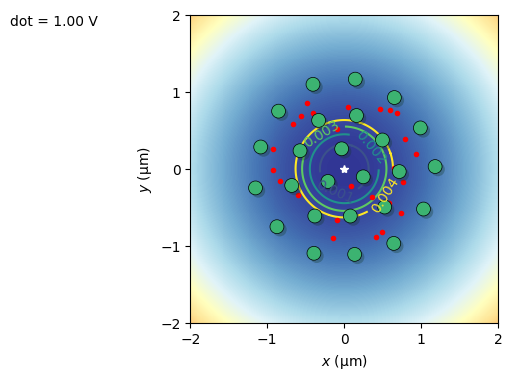

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
f = FullModel(potential_dict, voltages, **options)

# res = f.get_electron_positions(n_electrons=8, electron_initial_positions=None, verbose=False)
res = f.get_electron_positions(n_electrons=len(init_cond) // 2, electron_initial_positions=init_cond, verbose=True)
print(f.count_electrons_in_dot(res['x'], trap_bounds_x=(-2e-6, 2e-6), trap_bounds_y=(-2e-6, 2e-6)))
f.plot_potential_energy(dxdy=(4, 4), ax=ax, plot_contours=True)
ax.plot(init_cond[::2]*1e6, init_cond[1::2]*1e6, '.r')
f.plot_electron_positions(res, ax=ax)

In [46]:
f.grad_total(res['x'])

array([ -4.97782924,  -1.93465301,  -3.51672618,  -0.24502305,
        -3.50164362,  -7.2964928 ,   2.78170925,   3.25118025,
        -1.45854927,   4.68827419,   7.66270915,   4.75242279,
        -7.42934057,  -9.76453989,   0.03055116,  -1.92922997,
        -1.48194983,  -3.30542272,  -3.59454233,  -5.27168389,
         2.68268867,  -3.10705531,  -2.45980158,   9.70604827,
        -0.31355107,   5.99913315,  11.88218602, -15.87605047,
        14.21825335,  -4.17589556,   4.59280971,   9.89309534,
        -0.41472988,  -1.65841904,   3.03717802,   0.33461327,
        -3.89310517,   0.3570264 , -10.96333086,  -5.17704232,
         3.04708963,   8.18017711,   2.87468821,  -0.68757934,
        -0.07140595,  -0.9907208 ,  -0.49072265,   6.22145153,
        -8.05186215,   8.21196677])

In [43]:
res['x']

array([ 1.02880139e-06, -5.23528272e-07,  1.17990044e-06,  2.81597471e-08,
        1.42978794e-07,  1.16335242e-06, -6.82652993e-07, -2.17460381e-07,
       -8.53407093e-07,  7.47746721e-07,  7.14036754e-07, -3.72126302e-08,
        7.85065476e-08, -6.14282268e-07, -3.41538824e-08,  2.58528136e-07,
       -1.08545979e-06,  2.82198843e-07, -5.74376524e-07,  2.34185928e-07,
       -4.06321655e-07,  1.09651082e-06,  2.46136326e-07, -1.05097089e-07,
       -8.74358930e-07, -7.53054933e-07,  5.24190592e-07, -4.97126957e-07,
        4.95246375e-07,  3.73072521e-07, -3.33326518e-07,  6.27498923e-07,
       -3.93900342e-07, -1.09803323e-06, -3.82720730e-07, -6.13898161e-07,
        6.50860290e-07,  9.24341508e-07, -2.12082245e-07, -1.65114649e-07,
        6.42647960e-07, -9.69855312e-07, -1.15277916e-06, -2.49354974e-07,
        9.88276641e-07,  5.30014962e-07,  1.34619368e-07, -1.11244620e-06,
        1.59347923e-07,  6.90863314e-07])

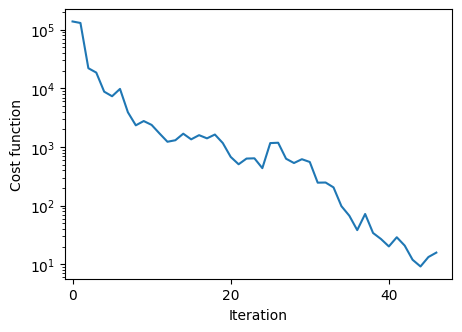

In [44]:
f.plot_convergence()

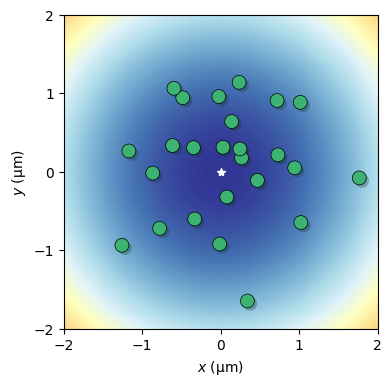

In [12]:
amim = f.animate_convergence(dxdy=(4, 4))

In [13]:
f.show_animation(amim)